In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten
# The layers we are importing are child of Layers class i.e Layers is the base class
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import random

<p style="font-size: 18px"> Keras is a high-level deep learning API developed by Google for implementing neural networks. It's used to make the implementation of neural networks easy </p>

In [30]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [31]:
type(x_train)

numpy.ndarray

[6]


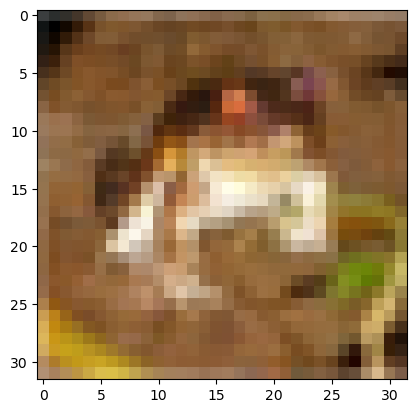

In [32]:
plt.imshow(x_train[0])
print(y_train[0])

In [33]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

<p style = "font-size:18px"> Batch normalization reduces the effect of invariate covariate shift. It's a technique for training very deep neural networks that standardizes the inputs to a layer for each mini batch. This enables the stabilize the learning process and remarkably reduce the number of training epocs required to train deep networks. </p>

<p style = "font-size: 18px"> This process is also called whitening in case of Computer Vision. </p>

<p style="font-size:18px"> Here, the term standardization refers to rescaling data to have a mean of zero and a standart deviation of one </p>

In [34]:
model = keras.Sequential()

model.add(BatchNormalization())
model.add(Conv2D(64,(5,5),activation = "relu", padding="same"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(128,(5,5),activation = "relu", padding="same"))   
# There're lots of parameters you can use for Conv2D object such as kernel, bias initializer , kernel and bias regularizer, data format etc.
# But main ones that I use is number of filters,kernel size,activation function, padding, strides etc.
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(256,(5,5),activation = "relu", padding="same"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

In [35]:
opt = Adam(learning_rate = 0.001)

model.compile(optimizer = opt,
              loss = "categorical_crossentropy",
              metrics = ['Accuracy'])

In [39]:
model.fit(x_train,y_train, batch_size = 100, epochs = 10 , validation_split = 0.1)

Epoch 1/10
450/450 [==============================] - 8s 18ms/step - loss: 0.5652 - Accuracy: 0.8022 - val_loss: 0.6858 - val_Accuracy: 0.7740
Epoch 2/10
450/450 [==============================] - 8s 17ms/step - loss: 0.4894 - Accuracy: 0.8276 - val_loss: 0.6830 - val_Accuracy: 0.7740
Epoch 3/10
450/450 [==============================] - 8s 17ms/step - loss: 0.4369 - Accuracy: 0.8469 - val_loss: 0.6907 - val_Accuracy: 0.7784
Epoch 4/10
450/450 [==============================] - 8s 17ms/step - loss: 0.3816 - Accuracy: 0.8674 - val_loss: 0.6608 - val_Accuracy: 0.7872
Epoch 5/10
450/450 [==============================] - 8s 18ms/step - loss: 0.3267 - Accuracy: 0.8838 - val_loss: 0.7649 - val_Accuracy: 0.7782
Epoch 6/10
450/450 [==============================] - 8s 17ms/step - loss: 0.3115 - Accuracy: 0.8897 - val_loss: 0.6944 - val_Accuracy: 0.7936
Epoch 7/10
450/450 [==============================] - 8s 17ms/step - loss: 0.2758 - Accuracy: 0.9041 - val_loss: 0.7546 - val_Accuracy: 0.7904

In [37]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.7301 - Accuracy: 0.7527


[0.7301272749900818, 0.7526999711990356]

<p style = "font-size:18px"> Lets predict our model and compare with the actual value</p>

1/1 [==============================] - 0s 161ms/step
1
1


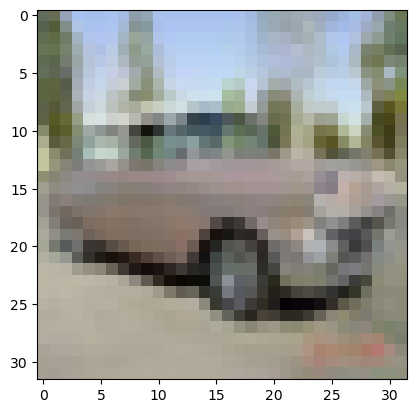

In [38]:
rand_int =  int(random.random() * 1000)
plt.imshow(x_test[rand_int])
print(np.argmax(model.predict(x_test[[rand_int]])))
print(np.argmax(y_test[rand_int]))